# 2020年12月16日　レポート課題

## 1. 波動方程式

$ 
\displaystyle \frac{\partial^2 u(x,t)}{\partial t^2} =\frac{\partial^2 u(x,t)}{\partial x^2} 
$

を差分法により，$\Delta t=0.01, \Delta x=0.0125$として数値的に解く．計算の空間領域 $x=[0, 1]$  ，時間領域 $t=[0, 2]$とする．

(1)　初期条件を $u(x,0)=\mathrm{exp}[-100(x-0.5)^2]$，境界条件を $\partial u(0,t)/\partial x=\partial u(1,t)/\partial x=0$とする．この時，計算開始からしばらくの間は以下の関数

$ 
\displaystyle u(x,t)=0.5\mathrm{exp}[-100(x+t-0.5)^2]+0.5\mathrm{exp}[-100(x-t-0.5)^2]
$

と一致することをアニメーションにより示しなさい．また，波の様子についてコメントしなさい．


(2) (1)の問題では，初期条件の関数にはピークが一つだけであった．初期条件の関数としてピークが三つある関数を用いて計算を実行し，計算結果をアニメーション表示しなさい．また，波の様子についてコメントしなさい．

(3)　(1)の問題で，境界条件を $u(0,t)=u(1,t)=0$に変更して計算を実行し，計算結果をアニメーション表示しなさい．また，波の様子についてコメントしなさい．

## 2. 拡散方程式

$ 
\displaystyle \frac{\partial u(x,t)}{\partial t} =\frac{\partial^2 u(x,t)}{\partial x^2} 
$

を差分法により数値的に解く．計算の空間領域 $x=[0, 1]$ ，時間領域 $t=[0, 0.2]$とする．

(1)　初期条件を$ u(x,0)=\mathrm{sin}(\pi x)$，境界条件を$u(0,t)=u(1,t)=0，$とする．この時，$\Delta t=0.002, \Delta x=0.1$として求めた数値解が以下の解析解

$ 
\displaystyle u(x,t)=\mathrm{exp}(-\pi^2t)\mathrm{sin}(\pi x)
$

と一致することをアニメーションにより示しなさい．また，変化の様子についてコメントしなさい．

(2)　(1)の問題で，初期条件と境界条件を自分で考えて与え，その時の数値解の様子をアニメーションにより示しなさい．また，変化の様子についてコメントしなさい．

(3)　(1)の問題で，$\Delta t=0.002, \Delta x=0.05$として求めた数値解が不安定化して振動する様子をアニメーションにより確認しなさい．また，このような数値的な不安定を避ける方法について調べて紹介しなさい．

## 3. 学期を通して講義に関する質問・コメントを書いてください． 

以上をまとめたipynbファイルを，2021年1月6日の0:00 までに，manabaのレポートから提出しなさい．

# 波動方程式の差分法による解の例

(拡散方程式のほうは自力でやってみましょう．)

<IPython.core.display.Javascript object>


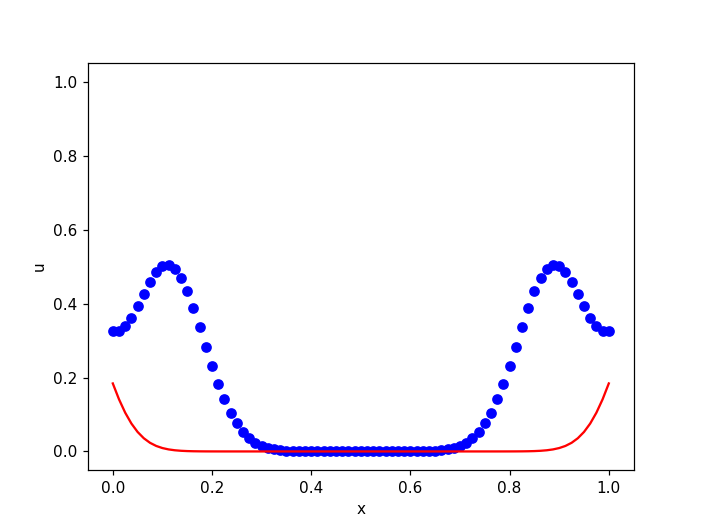

In [6]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dx = 0.0125 # 空間ステップ
dt = 0.01 # 時間ステップ
tmin = 0.0 # 計算開始時間 
tmax = 2.0 # 計算をこの時間までする

#　ｘの計算範囲（境界）
xmin = 0.0
xmax = 1.0 

c = 1.0 # 波の速度
Cw = (c*dt/dx)**2 #　定数 < 1

nx = int((xmax-xmin)/dx) + 1 # xの離散点（要素）数
nt = int((tmax-tmin)/dt) + 1 # tの離散点（要素）数
#print(nx,nt)

X = np.linspace(xmin, xmax, nx) # Xのarray
#print(X)

# 数値計算結果を格納する2Darray．とりあえず0の数値をいれている
u = np.zeros((nt,nx))  # u(t,x)
#print(u.shape)

# 初期条件
# 初期値
u_0 = np.exp(-100*(X-0.5)*(X-0.5)) 
# 初期速度
u_t = np.zeros(nx)
u[0] = u_0 # 初期条件の代入

# 1時間ステップ後の値
for ix in range(1,nx-1):
    u[1,ix] = u[0,ix] + dt * u_t[ix]+0.5*Cw*(u[0,ix-1]-2*u[0,ix]+u[0,ix+1]) 
#　ノイマン境界条件
u[1,0] = u[1,1]
u[1,nx-1] = u[1,nx-2]
#　ディリクレ境界条件
# u[1,0] = 0
# u[1,nx-1] =0

fig = plt.figure()
ims = []

#　２時間ステップ以降の計算開始
for it in range(1,nt-1):
    for ix in range(1,nx-1):
        u[it+1,ix] = 2*(1-Cw)*u[it,ix]-u[it-1,ix]+Cw*(u[it,ix-1]+u[it,ix+1])
    #　ノイマン境界条件
    u[it+1,0] = u[it+1,1]
    u[it+1,nx-1] = u[it+1,nx-2]
    #　ディリクレ境界条件
    #u[it+1,0] = 0
    #u[it+1,nx-1] =0
    
    # analytical solution
    ua_w = 0.5*np.exp(-100*(X+1*(it+1)*dt-0.5)*(X+(it+1)*dt-0.5)) +0.5*np.exp(-100*(X-1*(it+1)*dt-0.5)*(X-(it+1)*dt-0.5))

    im1 = plt.plot(X, u[it+1,:], "bo") #　数値解のプロット
    im2= plt.plot(X, ua_w, "r") #　解析解のプロット   
    ims.append(im1+im2)

ani = animation.ArtistAnimation(fig, ims) #interval=10)
plt.xlabel("x") #　横軸のラベル
plt.ylabel("u") #　縦軸のラベル
plt.show() 

ani.save("PDE_1Dwave.gif", writer="pillow") # 動画の保存
np.savetxt("u1Dwave.txt",u)